these things are bound to MultiPart(SimplePart(ptet-f),SimplePart(protein_tetr-f)): None
these things are bound to MultiPart(SimplePart(ptet-f),SimplePart(protein_tetr-f)): None
currently found part_ptet
these things are bound to MultiPart(SimplePart(ptet-f),SimplePart(protein_tetr-f)): None
currently found part_UTR1
currently found part_GFP
currently found part_t16
{'type': 'Promoter', 'name': 'ptet', 'fwd': True, 'opts': {'color': (0.9882352941176471, 0.803921568627451, 0.8980392156862745), 'color2': None, 'label': 'ptet', 'label_size': 13, 'label_y_offset': -8}}
{'type': 'Operator', 'name': protein_tetr, 'fwd': True, 'opts': {'color': (0.9882352941176471, 0.803921568627451, 0.8980392156862745), 'color2': None}}
{'type': 'RBS', 'name': 'UTR1', 'fwd': True, 'opts': {'color': (1.0, 0.9294117647058824, 0.43529411764705883), 'color2': None, 'label': 'UTR1', 'label_size': 13, 'label_y_offset': -8}}
{'type': 'CDS', 'name': 'GFP', 'fwd': True, 'opts': {'color': (0.7372549019607844, 0.501960

Loading BokehJS ...

D:\anaconda3\lib\site-packages\bokeh\plotting\graph.py:120: UserWarning: Node keys in 'layout_function' don't match node keys in the graph. These nodes may not be displayed correctly.
  warn("Node keys in 'layout_function' don't match node keys in the graph. "


{}


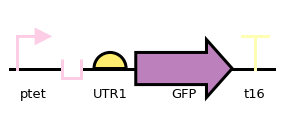

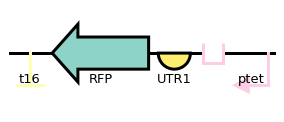

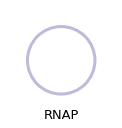

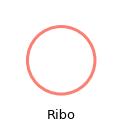

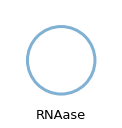

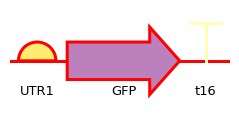

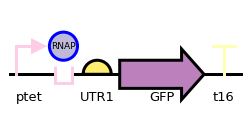

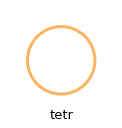

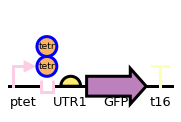

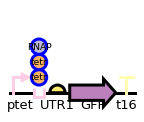

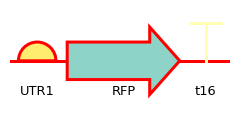

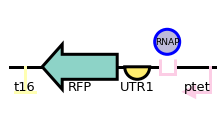

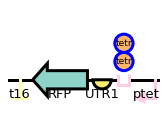

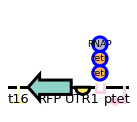

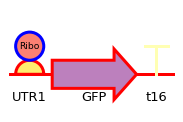

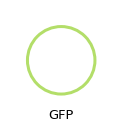

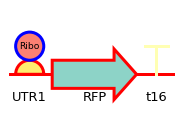

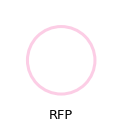

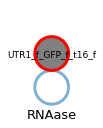

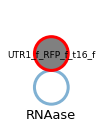

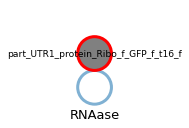

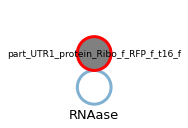

In [2]:
from biocrnpyler import *
import dnaplotlib as dpl
from bokeh.models import (Plot , Range1d)
import bokeh.plotting
import bokeh.io
%matplotlib inline

ptet = RegulatedPromoter("ptet",["tetr"],leak=True) #this is a repressible promoter
pconst = Promoter("pconst") #constitutive promoter
pcomb = CombinatorialPromoter("pcomb",["arac","laci"], leak=False,
                              tx_capable_list = [["arac"], ["laci"]]) #the Combinations A and B or just A or just B be transcribed
utr1 = RBS("UTR1") #regular RBS
utr2 = RBS("UTR1") #regular RBS
gfp = CDS("GFP") #a CDS has a name and a protein name. so this one is called GFP and the protein is also called GFP
fusrfp = CDS("fusRFP","RFP",no_stop_codons=["forward"]) #you can say that a protein has no stop codon. This is a little different from a fusion protein, because in this case you are saying that the ribosome reads through two proteins but still produces two distinct proteins, rather than one fused protein. This can happen in the case of the ta peptide which causes a peptide bond not to be formed while making a protein.
rfp = CDS("RFP") #regular RFP
cfp = CDS("CFP") #cfp
t16 = Terminator("t16") #a terminator stops transcription


#now that the parts are defined, we can put together our construct.
construct_1 = DNA_construct([[ptet,"forward"],[utr1,"forward"],[gfp,"forward"],[t16,"forward"]])
construct_2 = DNA_construct([[t16,"reverse"],[rfp,"reverse"],[utr1,"reverse"],[ptet,"reverse"]])

#now, we are using dnaplotlib to plot the constructs




#plotConstruct(construct_1,debug=False,plot_rnas=True)
#plotConstruct(construct_2,debug=False,plot_rnas=True)
plt.show()
#some very basic parameters are defined
parameters={"cooperativity":2,"kb":100, "ku":10, "ktx":.05, "ktl":.2, "kdeg":2,"kint":.05}

components = [construct_1,construct_2]
myMixture = TxTlExtract(name = "txtl", parameters = parameters, components = components)

c1 = myMixture.components[0]
c2 = myMixture.components[1]

dna_render = dpl.DNARenderer(scale = 5,linewidth=3)
rna_render = dpl.DNARenderer(scale = 5,linewidth=3,linecolor=(1,0,0))

mycrn = myMixture.compile_crn()
myplotter = CRNPlotter(dna_renderer=dna_render)

myplotter.renderMixture(myMixture)
            
DG,DGspec,DGrxn = generate_networkx_graph(myMixture.compile_crn(),imagedict=myplotter.species_image_dict)



bokeh.io.output_notebook() #this makes the graph appear in line with the notebook
plot = Plot(plot_width=500, plot_height=500, x_range=Range1d(-500, 500), y_range=Range1d(-500, 500)) #this generates a bokeh plot
graphPlot(DG,DGspec,DGrxn,plot) #now you draw the network on the plot. Layout "force" is the default.
#"posscale" scales the entire graph. This mostly just affects the size of the arrows relative to everything else
bokeh.io.show(plot) #if you don't type this the plot won't show
print("DGspec is")
print(DGspec[0])

In [2]:
myplotter.species_image_dict

{dna_ptet_f_UTR1_f_GFP_f_t16_f_: b'iVBORw0KGgoAAAANSUhEUgAAAQ4AAABsCAYAAACb+lxAAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAQS0lEQVR4nO3de1AT99oH8O8mBoRELgoIWAmSalGkqIjtEa03atXaar20h6rVemmnypS+Yl/OQR0R0Nde7IyKxdJSPcXjUH29FNSX12tFXrkU9DiWVkSJg7d6QyxRIyH5vX9QVjhFYAPJbpLnM8NMstns70kIX3Y3z+5yjDEGQggRQCZ2AYQQ20PBQQgRjIKDECIYBQchRDAKDkKIYBQchBDBKDgIIYJRcBBCBKPgIIQIRsFBCBGMgoMQIhgFByFEMAoOQohgFByEEMEoOAghglFwEEIEo+AghAhGwUEIEYyCgxAimFWDgxmM1hyOEGIhXaw5GPtNB9MjA2R+3cB1c7bm0ISQTmTV4AAA6OpgqrgLqJwoQAixUdYPjkYUIITYLPGCoxEFCCE2R/zgaEQBQojNkE5wNKIAIUTypBccjShACJEs6TeA/REgxgt3wGofi10NcQBGI/UbtYVrz0WnjaevW6OWduG6u4BTe4DjOLFLIXaqqKgIv/76K+bNmyd2KU3st/J4k1t9VPprHI2c5OAC3MEFUGgQy1u4cCFyc3PFLkOypB8cfwSGbIAPZF5KcDIKDWJ5RqMRM2bMQGlpqdilSJLgnaPyIf5mD2a6ch/s9oP2zewkB+erAtfdlcKCiOLBgweYNGkSCgoKEBQUJHI1rW86/FnTTRuhz22b9NY4aA2DSMitW7cwYcIE3LlzR+xSJEU6wUGBQSSqoqICkydPxsOHD8UuRTLEDw4KDGIDioqKEB0djfr6erFLkQTxgoMCg9gAh